In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [45]:
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [46]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=1)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_1 = lassBig.score(X_train2, Y_train)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.0268341343517

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -5.42632541e-06   5.43049680e+00]


In [47]:
lassBig = linear_model.Lasso(alpha=2)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_2 = lassBig.score(X_train2, Y_train)


R² for the model with many features:
0.0268341310407

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -5.42522471e-06   5.42939607e+00]


In [48]:
lassBig = linear_model.Lasso(alpha=3)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_3 = lassBig.score(X_train2, Y_train)


R² for the model with many features:
0.0268341255224

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -5.42412401e-06   5.42829534e+00]


In [49]:
lassBig = linear_model.Lasso(alpha=4)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_4 = lassBig.score(X_train2, Y_train)


R² for the model with many features:
0.0268341177968

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -5.42302331e-06   5.42719461e+00]


In [50]:
lassBig = linear_model.Lasso(alpha=5)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_5 = lassBig.score(X_train2, Y_train)


R² for the model with many features:
0.0268341078638

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -5.42192261e-06   5.42609387e+00]


In [51]:
lassBig = linear_model.Lasso(alpha=6)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_6 = lassBig.score(X_train2, Y_train)


R² for the model with many features:
0.0268340957236

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -5.42082192e-06   5.42499314e+00]


In [52]:
lassBig = linear_model.Lasso(alpha=7)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_7 = lassBig.score(X_train2, Y_train)


R² for the model with many features:
0.0268340813759

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -5.41972122e-06   5.42389241e+00]


In [53]:
lassBig = linear_model.Lasso(alpha=8)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_8 = lassBig.score(X_train2, Y_train)


R² for the model with many features:
0.026834064821

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -5.41862052e-06   5.42279168e+00]


In [54]:
lassBig = linear_model.Lasso(alpha=9)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_9 = lassBig.score(X_train2, Y_train)


R² for the model with many features:
0.0268340460588

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -5.41751982e-06   5.42169094e+00]


In [55]:
lassBig = linear_model.Lasso(alpha=10)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
l_10 = lassBig.score(X_train2, Y_train)


R² for the model with many features:
0.0268340250892

Parameter estimates for the model with many features:
[  0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -5.41641912e-06   5.42059021e+00]


In [56]:
ridgeregr = linear_model.Ridge(alpha=1, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_1 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.573968601452

Parameter estimates for the model with many features:
[ -4.27783831e-03  -7.58734740e-01   1.91749285e-01  -2.30805622e-03
   1.14873174e-02  -4.20909186e-03  -1.79503525e-02   1.95202108e-03
  -1.93416477e-05   0.00000000e+00]


In [57]:
ridgeregr = linear_model.Ridge(alpha=2, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_2 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.573963861181

Parameter estimates for the model with many features:
[ -3.62841637e-03  -7.58540878e-01   1.43847914e-01  -2.70051016e-03
   1.08509988e-02  -4.08146141e-03  -1.34768560e-02   1.46289617e-03
  -1.44957925e-05   0.00000000e+00]


In [58]:
ridgeregr = linear_model.Ridge(alpha=3, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_3 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.57396003014

Parameter estimates for the model with many features:
[ -3.22846210e-03  -7.58358018e-01   1.15052488e-01  -2.94851047e-03
   1.04649007e-02  -4.00180082e-03  -1.07819233e-02   1.16900315e-03
  -1.15842033e-05   0.00000000e+00]


In [59]:
ridgeregr = linear_model.Ridge(alpha=4, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_4 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.573957004144

Parameter estimates for the model with many features:
[ -2.95359241e-03  -7.58180710e-01   9.58327437e-02  -3.12409570e-03
   1.02042386e-02  -3.94619161e-03  -8.98197288e-03   9.72966988e-04
  -9.64209899e-06   0.00000000e+00]


In [60]:
ridgeregr = linear_model.Ridge(alpha=5, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_5 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.573954555355

Parameter estimates for the model with many features:
[ -2.75035289e-03  -7.58006613e-01   8.20932498e-02  -3.25822468e-03
   1.00153856e-02  -3.90435469e-03  -7.69484396e-03   8.32936623e-04
  -8.25484777e-06   0.00000000e+00]


In [61]:
ridgeregr = linear_model.Ridge(alpha=6, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_6 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.573952509401

Parameter estimates for the model with many features:
[ -2.59196761e-03  -7.57834553e-01   7.17826152e-02  -3.36640487e-03
   9.87147976e-03  -3.87114119e-03  -6.72875442e-03   7.27948082e-04
  -7.21475646e-06   0.00000000e+00]


In [62]:
ridgeregr = linear_model.Ridge(alpha=7, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_7 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.573950745449

Parameter estimates for the model with many features:
[ -2.46354164e-03  -7.57663877e-01   6.37597191e-02  -3.45726263e-03
   9.75757825e-03  -3.84368691e-03  -5.97693100e-03   6.46339572e-04
  -6.40629081e-06   0.00000000e+00]


In [63]:
ridgeregr = linear_model.Ridge(alpha=8, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_8 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.573949180202

Parameter estimates for the model with many features:
[ -2.35612916e-03  -7.57494194e-01   5.73392310e-02  -3.53597877e-03
   9.66470667e-03  -3.82027163e-03  -5.37521749e-03   5.81107215e-04
  -5.76006320e-06   0.00000000e+00]


In [64]:
ridgeregr = linear_model.Ridge(alpha=9, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_9 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.573947755296

Parameter estimates for the model with many features:
[ -2.26403286e-03  -7.57325254e-01   5.20847043e-02  -3.60585269e-03
   9.58714965e-03  -3.79979985e-03  -4.88274411e-03   5.27790625e-04
  -5.23188457e-06   0.00000000e+00]


In [65]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregr.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(ridgeregr.score(X_train2, Y_train))
origparams = np.append(ridgeregr.coef_, ridgeregr.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)
r_10 = ridgeregr.score(X_train2, Y_train)


R² for the model with many features:
0.573946428961

Parameter estimates for the model with many features:
[ -2.18345205e-03  -7.57156891e-01   4.77049992e-02  -3.66908529e-03
   9.52109450e-03  -3.78154074e-03  -4.47224220e-03   4.83414403e-04
  -4.79227770e-06   0.00000000e+00]


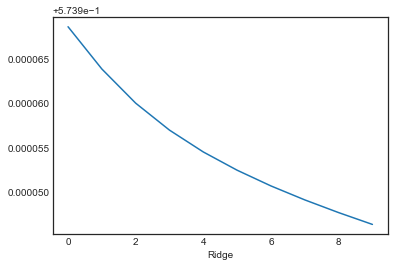

In [71]:
l = [l_1, l_2, l_3, l_4, l_5, l_6, l_7, l_8, l_9, l_10]
r = [r_1, r_2, r_3, r_4, r_5, r_6, r_7, r_8, r_9, r_10]
plt.plot(r)
plt.xlabel('Ridge')
plt.show()

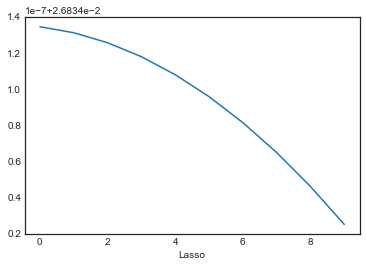

In [72]:
plt.plot(l)
plt.xlabel('Lasso')
plt.show()